In [1]:
from tesarot.lc_analysis import lc_ana
from tesarot.tpf_analysis import ana_tpf
from tesarot.lc_analysis import plotter_lc
from tesarot.tpf_analysis import plotter_tpf
from tesarot.tpf_analysis import wcs_tpf
from tesarot.utils import utils
import astropy.units as u
import os

target_for_dl=  "TIC 17198188"
target = target_for_dl.replace(" ","")
out_dir = "./data"
out_dir_for_target = utils.make_output_folder_for_target(target, out_dir)
radius_gaia_search = (12/2.0) * 20*u.arcsec*1.5

lc analysis
SearchResult containing 2 data products.

 #     mission     year author exptime target_name distance
                                  s                 arcsec 
--- -------------- ---- ------ ------- ----------- --------
  0 TESS Sector 43 2021   SPOC     120    17198188      0.0
  1 TESS Sector 44 2021   SPOC     120    17198188      0.0
./data/TIC17198188/lc_TESS_Sector_43_17198188_120s.fits
./data/TIC17198188/lc_TESS_Sector_44_17198188_120s.fits
SearchResult containing 2 data products.

 #     mission     year author exptime target_name distance
                                  s                 arcsec 
--- -------------- ---- ------ ------- ----------- --------
  0 TESS Sector 43 2021   SPOC     120    17198188      0.0
  1 TESS Sector 44 2021   SPOC     120    17198188      0.0


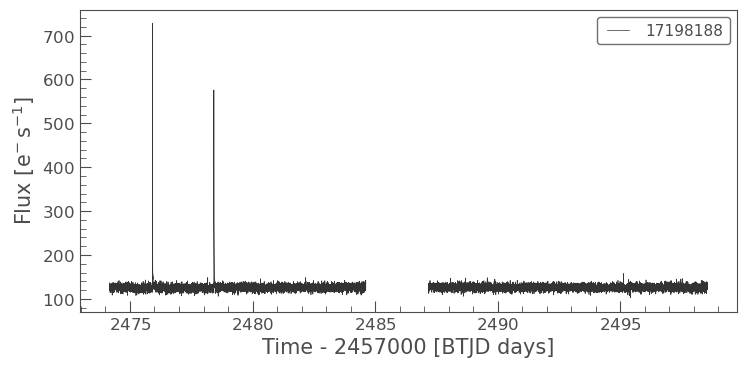

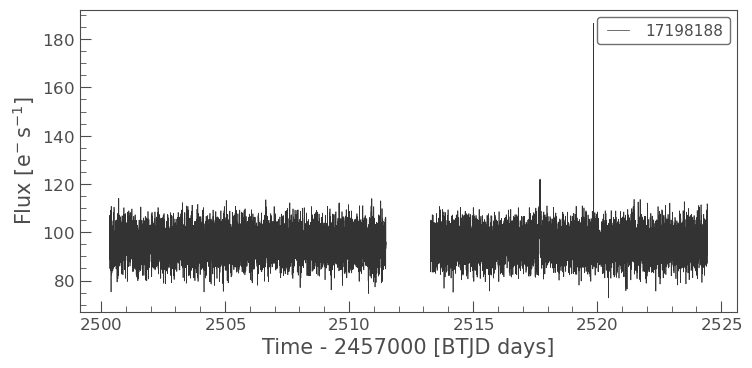

In [2]:
## lc analysis
print("lc analysis")
result_file_name =os.path.join(out_dir_for_target, "search_resut_lc_%s.csv" % target)
if os.path.exists(result_file_name):
    lc_collection, search_result = lc_ana.load_data(out_dir_for_target, target)
else:
    lc_collection, search_result = lc_ana.get_tess_lcs(target_for_dl)
    lc_ana.save_lcs(lc_collection, search_result, out_dir_for_target)
    lc_ana.save_search_result(search_result, target, out_dir_for_target)
print(search_result)
file_heads = utils.make_output_name_for_lcs(search_result)
plotter_lc.plot_lcs(lc_collection, target, file_heads, out_dir_for_target)
periods = lc_ana.get_periods(lc_collection)


In [3]:
## tpf analysis
print("tpf analysis")
result_file_name_tpf =os.path.join(out_dir_for_target, "search_resut_tpf_%s.csv" % target)
if os.path.exists(result_file_name_tpf):
    tpfs, search_result_tpf =ana_tpf.load_data_tpf(out_dir_for_target, target)

else:
    tpfs, search_result_tpf = ana_tpf.get_tess_tpf(target_for_dl)
    ana_tpf.save_tpf(tpfs, search_result_tpf,  out_dir_for_target)
    ana_tpf.save_search_result_tpf(search_result_tpf, target, out_dir_for_target)
print(search_result_tpf)
ra, dec, gaia_mag, gaia_stars = utils.get_gaia_stars(target, radius_gaia_search)
plotter_tpf.plot_tpfs_with_gaia(tpfs, target, out_dir_for_target, gaia_stars)


tpf analysis
SearchResult containing 2 data products.

 #     mission     year author exptime target_name distance
                                  s                 arcsec 
--- -------------- ---- ------ ------- ----------- --------
  0 TESS Sector 43 2021   SPOC     120    17198188      0.0
  1 TESS Sector 44 2021   SPOC     120    17198188      0.0


In [6]:
## differentail imaging
import importlib
importlib.reload(plotter_tpf)
print("differential imaging")
avg_images, diff_images, periods, folded_lcs, folded_bin_lcs = ana_tpf.make_difference_image_for_tpfs(tpfs, \
    period_inputs  = periods, aperture_mask ="default")

wcs_arr = wcs_tpf.get_wcs_from_tpfs(tpfs)
file_heads_tpf = utils.make_output_name_for_tpfs(search_result)
plotter_tpf.plot_diffiamges_with_gaia(avg_images, diff_images, target, \
    gaia_stars, periods,file_heads_tpf,  wcs_arr, out_dir=out_dir_for_target)

differential imaging
diff_image:0
diff_image:1
